In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [3]:
df = pd.read_csv("data_cleaned.csv")

df.head()

,Mã tin,Xuất xứ,Tình trạng,Dòng xe,Số Km đã đi,Màu ngoại thất,Màu nội thất,Số cửa,Số chỗ ngồi,Động cơ,...,Hộp số,Dẫn động,Tiêu thụ nhiên liệu,Hãng,Grade,Năm sản xuất,Tên xe,Giá,Loại máy,Giá xe
0,2261455,Nhập khẩu,Xe đã dùng,SUV,78000,Vàng,Đen,5,7,Xăng\t3.6 L,...,Số tự động,AWD 4 bánh toàn thời gian,L/100Km,Audi,Q7,2009,Xe Audi Q7 S-line 3.6 AT 2009,580 Triệu,Xăng,580000000
1,3155495,Lắp ráp trong nước,Xe đã dùng,Sedan,59000,Vàng,Kem,4,5,Xăng\t1.5 L,...,Số tay,FWD Dẫn động cầu trước,L/100Km,Toyota,Vios,2016,Xe Toyota Vios 1.5E 2016,311 Triệu,Xăng,311000000
2,3197114,Nhập khẩu,Xe đã dùng,Sedan,85000,Trắng,Kem,4,5,Xăng\t3.5 L,...,Số tự động,RFD Dẫn động cầu sau,L/100Km,Mercedes Benz,S class,2006,Xe Mercedes Benz S class S350 2006,535 Triệu,Xăng,535000000
3,4769153,Nhập khẩu,Xe đã dùng,SUV,52000,Xám,Nâu,5,7,Xăng\t3.0 L,...,Số tự động,AWD 4 bánh toàn thời gian,L/100Km,BMW,X7,2020,Xe BMW X7 xDrive40i 2020,5 Tỷ 900 Triệu,Xăng,5900000000
4,4769163,Lắp ráp trong nước,Xe đã dùng,Hatchback,70000,Trắng,Đen,5,5,Xăng\t1.5 L,...,Số tự động,FWD Dẫn động cầu trước,L/100Km,Mazda,3,2017,Xe Mazda 3 1.5 AT 2017,495 Triệu,Xăng,495000000


In [4]:
# brands =  sorted(list(df['Tiêu thụ nhiên liệu'].unique()))
# length = len(brands)

# with open('test.txt', 'w', encoding='utf8') as f: 
#     for i in range(0, length):
#         f.write(f'<option value="{i}">{brands[i]}</option>')
#         f.write('\n')
# f.close()

In [5]:
cate_col = ['Xuất xứ','Dòng xe','Màu ngoại thất','Màu nội thất', 'Động cơ', 'Hộp số', 'Dẫn động', 'Tiêu thụ nhiên liệu',
            'Hãng', 'Grade', 'Năm sản xuất', 'Loại máy']
for col in cate_col:
    print(f'{col}: {df[col].unique()}')

Xuất xứ: ['Nhập khẩu' 'Lắp ráp trong nước']
Dòng xe: ['SUV' 'Sedan' 'Hatchback' 'Bán tải / Pickup' 'Crossover' 'Van/Minivan'
 'Coupe' 'Convertible/Cabriolet' 'Truck' 'Wagon']
Màu ngoại thất: ['Vàng' 'Trắng' 'Xám' 'Đen' 'Đỏ' 'Bạc' 'Xanh' 'Cam' 'Kem' 'Cát' 'Hồng'
 'Nâu' 'Ghi' 'Đồng' 'Màu khác' 'Tím' 'Nhiều màu']
Màu nội thất: ['Đen' 'Kem' 'Nâu' 'Nhiều màu' 'Ghi' 'Xám' 'Đỏ' 'Màu khác' 'Cam' 'Bạc'
 'Vàng' 'Cát' 'Trắng' 'Xanh' 'Đồng' 'Tím' 'Hồng']
Động cơ: ['Xăng\t3.6 L' 'Xăng\t1.5 L' 'Xăng\t3.5 L' 'Xăng\t3.0 L' 'Xăng\t2.0 L'
 'Dầu\t2.5 L' 'Dầu\t2.2 L' 'Xăng\t1.8 L' 'Xăng\t1.2 L' 'Dầu\t2.0 L'
 'Xăng\t1.6 L' 'Xăng\t6.2 L' 'Xăng\t0.8 L' 'Xăng\t2.5 L' 'Xăng\t1.4 L'
 'Dầu\t2.4 L' 'Dầu\t2.1 L' 'Xăng\t4.0 L' 'Điện' 'Xăng\t1.25 L'
 'Xăng\t3.3 L' 'Xăng\t2.4 L' 'Xăng\t5.7 L' 'Dầu\t1.9 L' 'Xăng\t1.1 L'
 'Xăng\t6.0 L' 'Xăng\t4.6 L' 'Xăng\t4.7 L' 'Xăng\t1.3 L' 'Xăng\t1.0 L'
 'Xăng\t4.5 L' 'Dầu\t2.8 L' 'Hybrid\t1.8 L' 'Xăng\t2.7 L' 'Xăng\t5.0 L'
 'Hybrid\t2.0 L' 'Dầu\t3.2 L' 'Hybrid\t3.0 L' 'Dầu\t2.7 

In [6]:
df = df.drop(columns=['Tên xe', 'Mã tin', 'Động cơ', 'Hệ thống nạp nhiên liệu', 'Giá', 'Tình trạng'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24548 entries, 0 to 24547
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Xuất xứ              24548 non-null  object
 1   Dòng xe              24548 non-null  object
 2   Số Km đã đi          24548 non-null  int64 
 3   Màu ngoại thất       24548 non-null  object
 4   Màu nội thất         24548 non-null  object
 5   Số cửa               24548 non-null  int64 
 6   Số chỗ ngồi          24548 non-null  int64 
 7   Hộp số               24548 non-null  object
 8   Dẫn động             24548 non-null  object
 9   Tiêu thụ nhiên liệu  24548 non-null  object
 10  Hãng                 24548 non-null  object
 11  Grade                24548 non-null  object
 12  Năm sản xuất         24548 non-null  int64 
 13  Loại máy             24548 non-null  object
 14  Giá xe               24548 non-null  int64 
dtypes: int64(5), object(10)
memory usage: 2.8+ MB


In [8]:
from sklearn import preprocessing
category_col = ['Xuất xứ','Dòng xe','Màu ngoại thất','Màu nội thất', 'Hộp số', 'Dẫn động', 'Tiêu thụ nhiên liệu',
            'Hãng', 'Grade', 'Loại máy']
labelEncoder = preprocessing.LabelEncoder()
 
mapping_dict = {}
for col in category_col:
    df[col] = labelEncoder.fit_transform(df[col].astype(str))
    le_name_mapping = dict(zip(labelEncoder.classes_,
                               labelEncoder.transform(labelEncoder.classes_)))
    mapping_dict[col] = le_name_mapping
print(mapping_dict)

{'Xuất xứ': {'Lắp ráp trong nước': 0, 'Nhập khẩu': 1}, 'Dòng xe': {'Bán tải / Pickup': 0, 'Convertible/Cabriolet': 1, 'Coupe': 2, 'Crossover': 3, 'Hatchback': 4, 'SUV': 5, 'Sedan': 6, 'Truck': 7, 'Van/Minivan': 8, 'Wagon': 9}, 'Màu ngoại thất': {'Bạc': 0, 'Cam': 1, 'Cát': 2, 'Ghi': 3, 'Hồng': 4, 'Kem': 5, 'Màu khác': 6, 'Nhiều màu': 7, 'Nâu': 8, 'Trắng': 9, 'Tím': 10, 'Vàng': 11, 'Xanh': 12, 'Xám': 13, 'Đen': 14, 'Đỏ': 15, 'Đồng': 16}, 'Màu nội thất': {'Bạc': 0, 'Cam': 1, 'Cát': 2, 'Ghi': 3, 'Hồng': 4, 'Kem': 5, 'Màu khác': 6, 'Nhiều màu': 7, 'Nâu': 8, 'Trắng': 9, 'Tím': 10, 'Vàng': 11, 'Xanh': 12, 'Xám': 13, 'Đen': 14, 'Đỏ': 15, 'Đồng': 16}, 'Hộp số': {'Khác': 0, 'Số hỗn hợp': 1, 'Số tay': 2, 'Số tự động': 3}, 'Dẫn động': {'4WD  Dẫn động 4 bánh': 0, '4WD hoặc AWD': 1, 'AWD  4 bánh toàn thời gian': 2, 'FWD  Dẫn động cầu trước': 3, 'Khác': 4, 'RFD  Dẫn động cầu sau': 5}, 'Tiêu thụ nhiên liệu': {'\tL/100Km': 0, ' 7\tL/100Km': 1, ' 8\tL/100Km': 2, '0\tL/100Km': 3, '00\tL/100Km': 4, '05\

<Axes: >

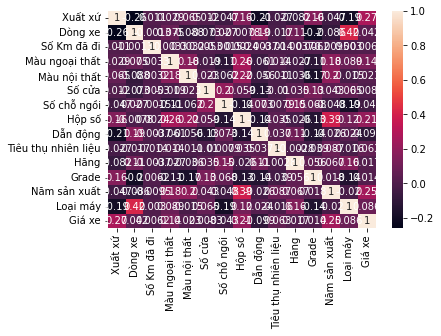

In [9]:
sns.heatmap(df.corr(), annot=True)

In [10]:
df

,Xuất xứ,Dòng xe,Số Km đã đi,Màu ngoại thất,Màu nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Tiêu thụ nhiên liệu,Hãng,Grade,Năm sản xuất,Loại máy,Giá xe
0,1,5,78000,11,14,5,7,3,2,73,2,306,2009,3,580000000
1,0,6,59000,11,5,4,5,2,3,73,67,414,2016,3,311000000
2,1,6,85000,9,5,4,5,3,5,73,46,333,2006,3,535000000
3,1,5,52000,13,8,5,7,3,2,73,3,433,2020,3,5900000000
4,0,4,70000,9,14,5,5,3,3,73,43,8,2017,3,495000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24543,1,6,0,12,14,4,5,3,3,73,43,8,2009,3,255000000
24544,1,0,55000,9,14,4,5,3,0,73,22,324,2018,0,679000000
24545,0,6,90000,14,3,4,5,3,3,73,67,87,2011,3,473000000
24546,0,3,22000,9,14,5,5,3,3,73,50,11,2022,3,985000000


In [11]:
X,y = df.drop('Giá xe', axis=1), df['Giá xe']

In [12]:
X

,Xuất xứ,Dòng xe,Số Km đã đi,Màu ngoại thất,Màu nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Tiêu thụ nhiên liệu,Hãng,Grade,Năm sản xuất,Loại máy
0,1,5,78000,11,14,5,7,3,2,73,2,306,2009,3
1,0,6,59000,11,5,4,5,2,3,73,67,414,2016,3
2,1,6,85000,9,5,4,5,3,5,73,46,333,2006,3
3,1,5,52000,13,8,5,7,3,2,73,3,433,2020,3
4,0,4,70000,9,14,5,5,3,3,73,43,8,2017,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24543,1,6,0,12,14,4,5,3,3,73,43,8,2009,3
24544,1,0,55000,9,14,4,5,3,0,73,22,324,2018,0
24545,0,6,90000,14,3,4,5,3,3,73,67,87,2011,3
24546,0,3,22000,9,14,5,5,3,3,73,50,11,2022,3


Feature Importance

In [13]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_)

[0.0729719  0.03790998 0.02300143 0.01680691 0.02151144 0.02624758
 0.15278182 0.01547689 0.1981052  0.00575061 0.12739354 0.11954483
 0.14255321 0.03994467]


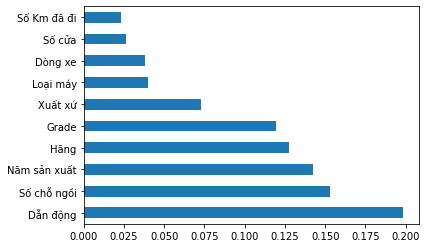

In [14]:
import matplotlib.pyplot as plt
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=42)

Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [17]:
# from sklearn.metrics import accuracy_score

# Making predictions on the testing set
y_pred = reg.predict(X_test)

In [18]:
# scores
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'MAE = {mae:.2f}')
print(f'MSE = {mse:.2f}')
print(f'RMSE = {rmse:.2f}')
print(f'MAPE = {mape: .2f}')
# R-squared
print(f'R-squared = {r2_score(y_test,y_pred)}')
# print('Slope:', reg.coef_)
# print('Intercept:', reg.intercept_)

MAE = 814520657.91
MSE = 2454522957202630144.00
RMSE = 1566691723.73
MAPE =  1.51
R-squared = 0.2031147810023285


Random Forest

In [19]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [20]:
rf.fit(X.values,y.values.ravel())

RandomForestRegressor()

In [21]:
from sklearn.model_selection import cross_val_score
score1=cross_val_score(rf,X_train,y_train,cv=5,scoring='r2')
score1.mean()

0.9024312646746943

In [22]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'MAE = {mae:.2f}')
print(f'MSE = {mse:.2f}')
print(f'RMSE = {rmse:.2f}')
print(f'MAPE = {mape: .2f}')
# R-squared
print(f'R-squared = {r2_score(y_test,y_pred)}')
# rf.score(X_test,y_test)

MAE = 40994903.21
MSE = 33780325692553580.00
RMSE = 183794248.26
MAPE =  0.05
R-squared = 0.9890328822721617


c:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Bagging

In [23]:
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import make_regression
bag = BaggingRegressor(n_estimators=10, random_state=0)
bag.fit(X_train, y_train)

BaggingRegressor(random_state=0)

In [24]:
# Making predictions on the testing set
y_pred = bag.predict(X_test)
print('Training cofficient of R2 : %.3f'%bag.score(X_train, y_train))
print('Test cofficient of R2 : %.3f'%bag.score(X_test, y_test))

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'MAE = {mae:.2f}')
print(f'MSE = {mse:.2f}')
print(f'RMSE = {rmse:.2f}')
print(f'MAPE = {mape: .2f}')
# R-squared
print(f'R-squared = {r2_score(y_test,y_pred)}')

Training cofficient of R2 : 0.986
Test cofficient of R2 : 0.841
MAE = 135454030.01
MSE = 489591543376983936.00
RMSE = 699708184.44
MAPE =  0.15
R-squared = 0.8410492502754915


Test

In [25]:
# record = [0, 0, 7, 0, 16, 10, 2, 2, 2, 5, 73, 62, 314, 2022, 3]
# record = np.array(record)                   # 249000000 ---- 2.40814833e+08
# rf.predict(record.reshape(1, -1))

# record = X.loc[3075].values            # 755000000 ---- 7.4808e+08
# rf.predict(record.reshape(1, -1))

# record = X.loc[9836].values            # 12800000000 ---- 1.295095e+10
# rf.predict(record.reshape(1, -1))

# record = X.loc[23456].values            # 290000000 ---- 2.44239667e+08
# rf.predict(record.reshape(1, -1))

# record = X.loc[30000].values            # 13500000000 ---- 1.295095e+10
# rf.predict(record.reshape(1, -1))

record = X.loc[24547].values            # 175000000 ---- 1.782675e+08
rf.predict(record.reshape(1, -1))



array([5.8039e+08])

Create file .pkl

In [26]:
# import pickle
# pickle.dump(rf, open("model.pkl", 'wb'))